In [96]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras.layers import Dense, Input

from sklearn import svm
from sklearn import metrics

import pandas as pd

In [63]:
dataFrame = pd.read_csv("citrus.csv")

headers = dataFrame.columns.values

# -1 is for the name, which will be the output
numParameters = len(headers) - 1
numSamples = len(dataFrame)

allInput = np.zeros([numSamples, numParameters])
allOutput = np.zeros(numSamples)

for i in range(numParameters):
    #print(headers[i])
    #print(dataFrame[headers[i]])
    allInput[:,i] = dataFrame[headers[i+1]]
    
# Set all orange entries to 1, grapefruit stays at 0
allOutput[dataFrame[headers[0]] == "orange"] = 1

randomOrder = np.arange(numSamples)
np.random.shuffle(randomOrder)

# We have to randomly sort the input since it is sorted by type originally
allInput = allInput[randomOrder]
allOutput = allOutput[randomOrder]

# Save some samples for validation (5%)
numValidationSamples = int(.05*numSamples)

validationInput = allInput[:numValidationSamples]
validationOutput = allOutput[:numValidationSamples]

trainingInput = allInput[numValidationSamples:]
trainingOutput = allOutput[numValidationSamples:]

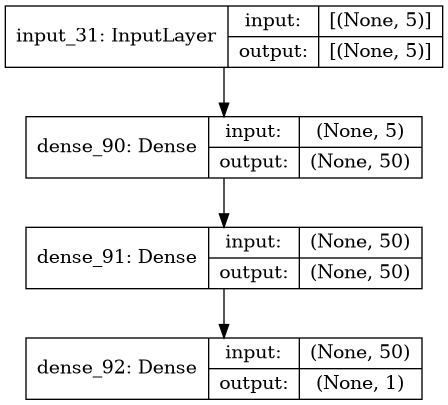

In [123]:
# Now setup the network
numNeurons = 50

model = keras.Sequential()

model.add(Input(shape=(numParameters)))
model.add(Dense(numNeurons, activation="tanh"))
model.add(Dense(numNeurons, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

keras.utils.plot_model(model, show_shapes=True)

In [124]:
# Now do the training
batchsize = 100
numEpochs = 4

model.fit(trainingInput, trainingOutput, epochs=numEpochs)

model.evaluate(validationInput, validationOutput)

Epoch 1/4
297/297 [==============================] - 1s 3ms/step - loss: 0.3908 - accuracy: 0.8210
Epoch 2/4
297/297 [==============================] - 1s 4ms/step - loss: 0.2128 - accuracy: 0.9160
Epoch 3/4
297/297 [==============================] - 1s 4ms/step - loss: 0.2029 - accuracy: 0.9215
Epoch 4/4
16/16 [==============================] - 0s 3ms/step - loss: 0.2293 - accuracy: 0.9040


[0.22933463752269745, 0.9039999842643738]

In [98]:
# Try with an SVM
svmModel = svm.SVC(kernel='linear')

svmModel.fit(trainingInput, trainingOutput)

testOutput = svmModel.predict(validationInput)
print(f"SVM Accuracy: {metrics.accuracy_score(testOutput, validationOutput)}")
print(f"SVM Precision: {metrics.precision_score(testOutput, validationOutput)}")

SVM Accuracy: 0.97
SVM Precision: 0.9507575757575758
